In [ ]:
!nvidia-smi

**Step 01 # Install the Ultralytics Package**

In [ ]:
!pip install ultralytics

**Step 02 # Import All the Requried Libraries**

In [ ]:
from ultralytics import YOLO
from IPython.display import Image

**Step 03 Train YOLO11 Model on a Custom Dataset**

In [ ]:
!yolo task=detect mode=train data="basic_dataset/data.yaml" model="YOLO11_basic.pt" epochs=50 imgsz=640

**Step # 05 Examine Training Results**

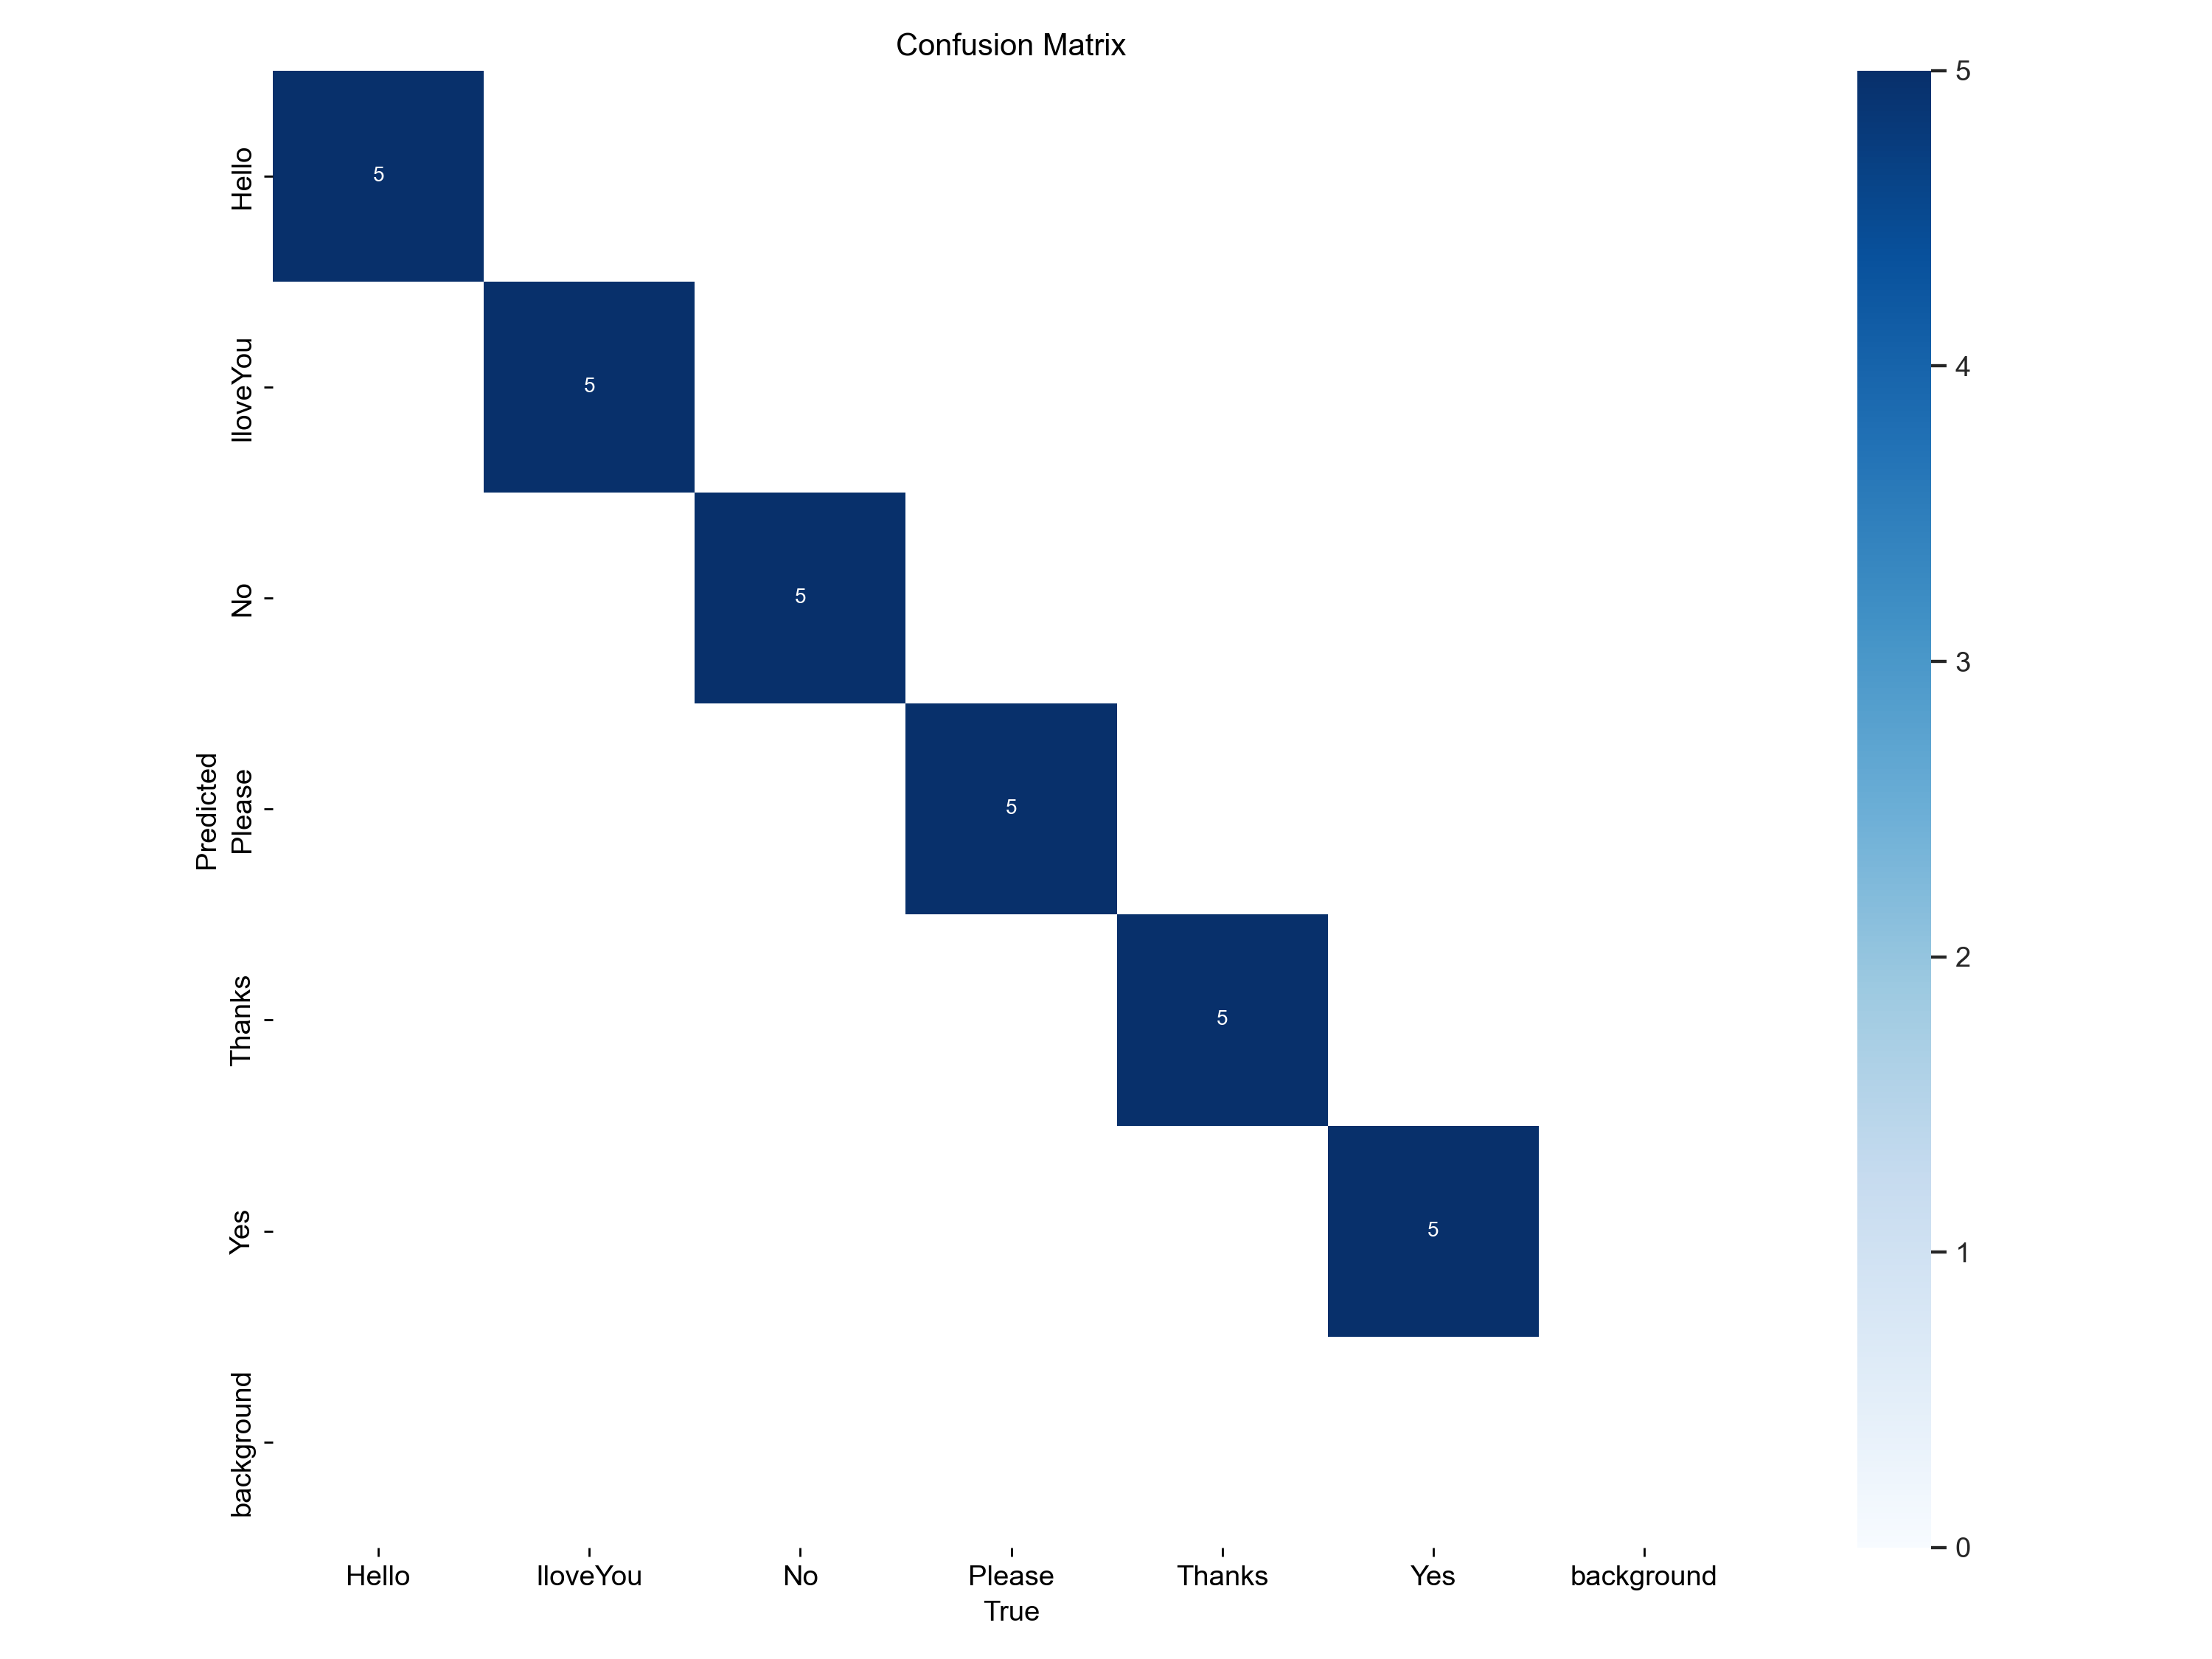

In [17]:
Image("runs/detect/train/confusion_matrix.png", width=600)

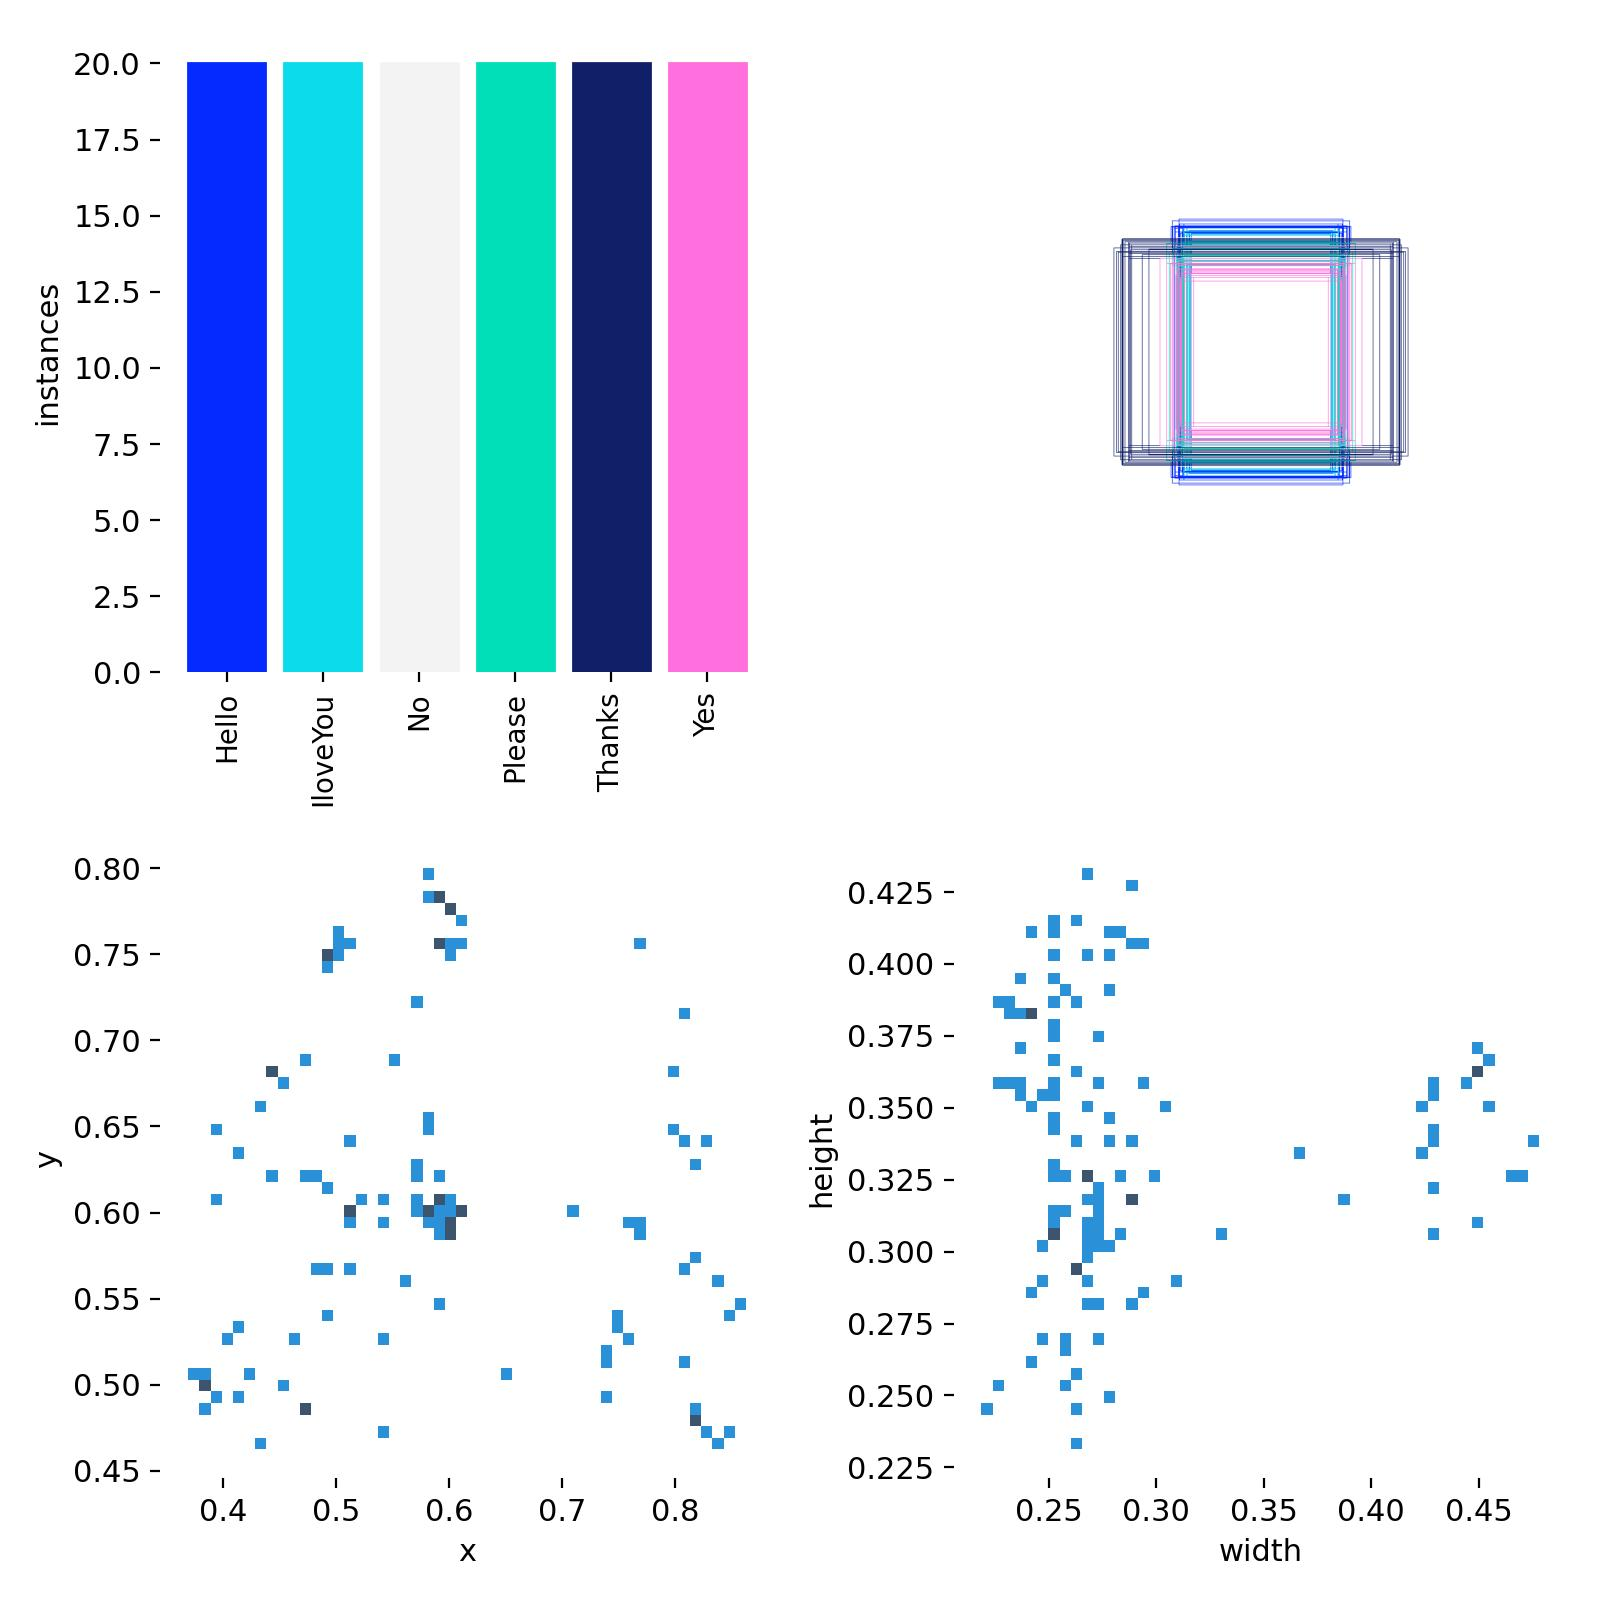

In [18]:
Image("runs/detect/train/labels.jpg", width=600)

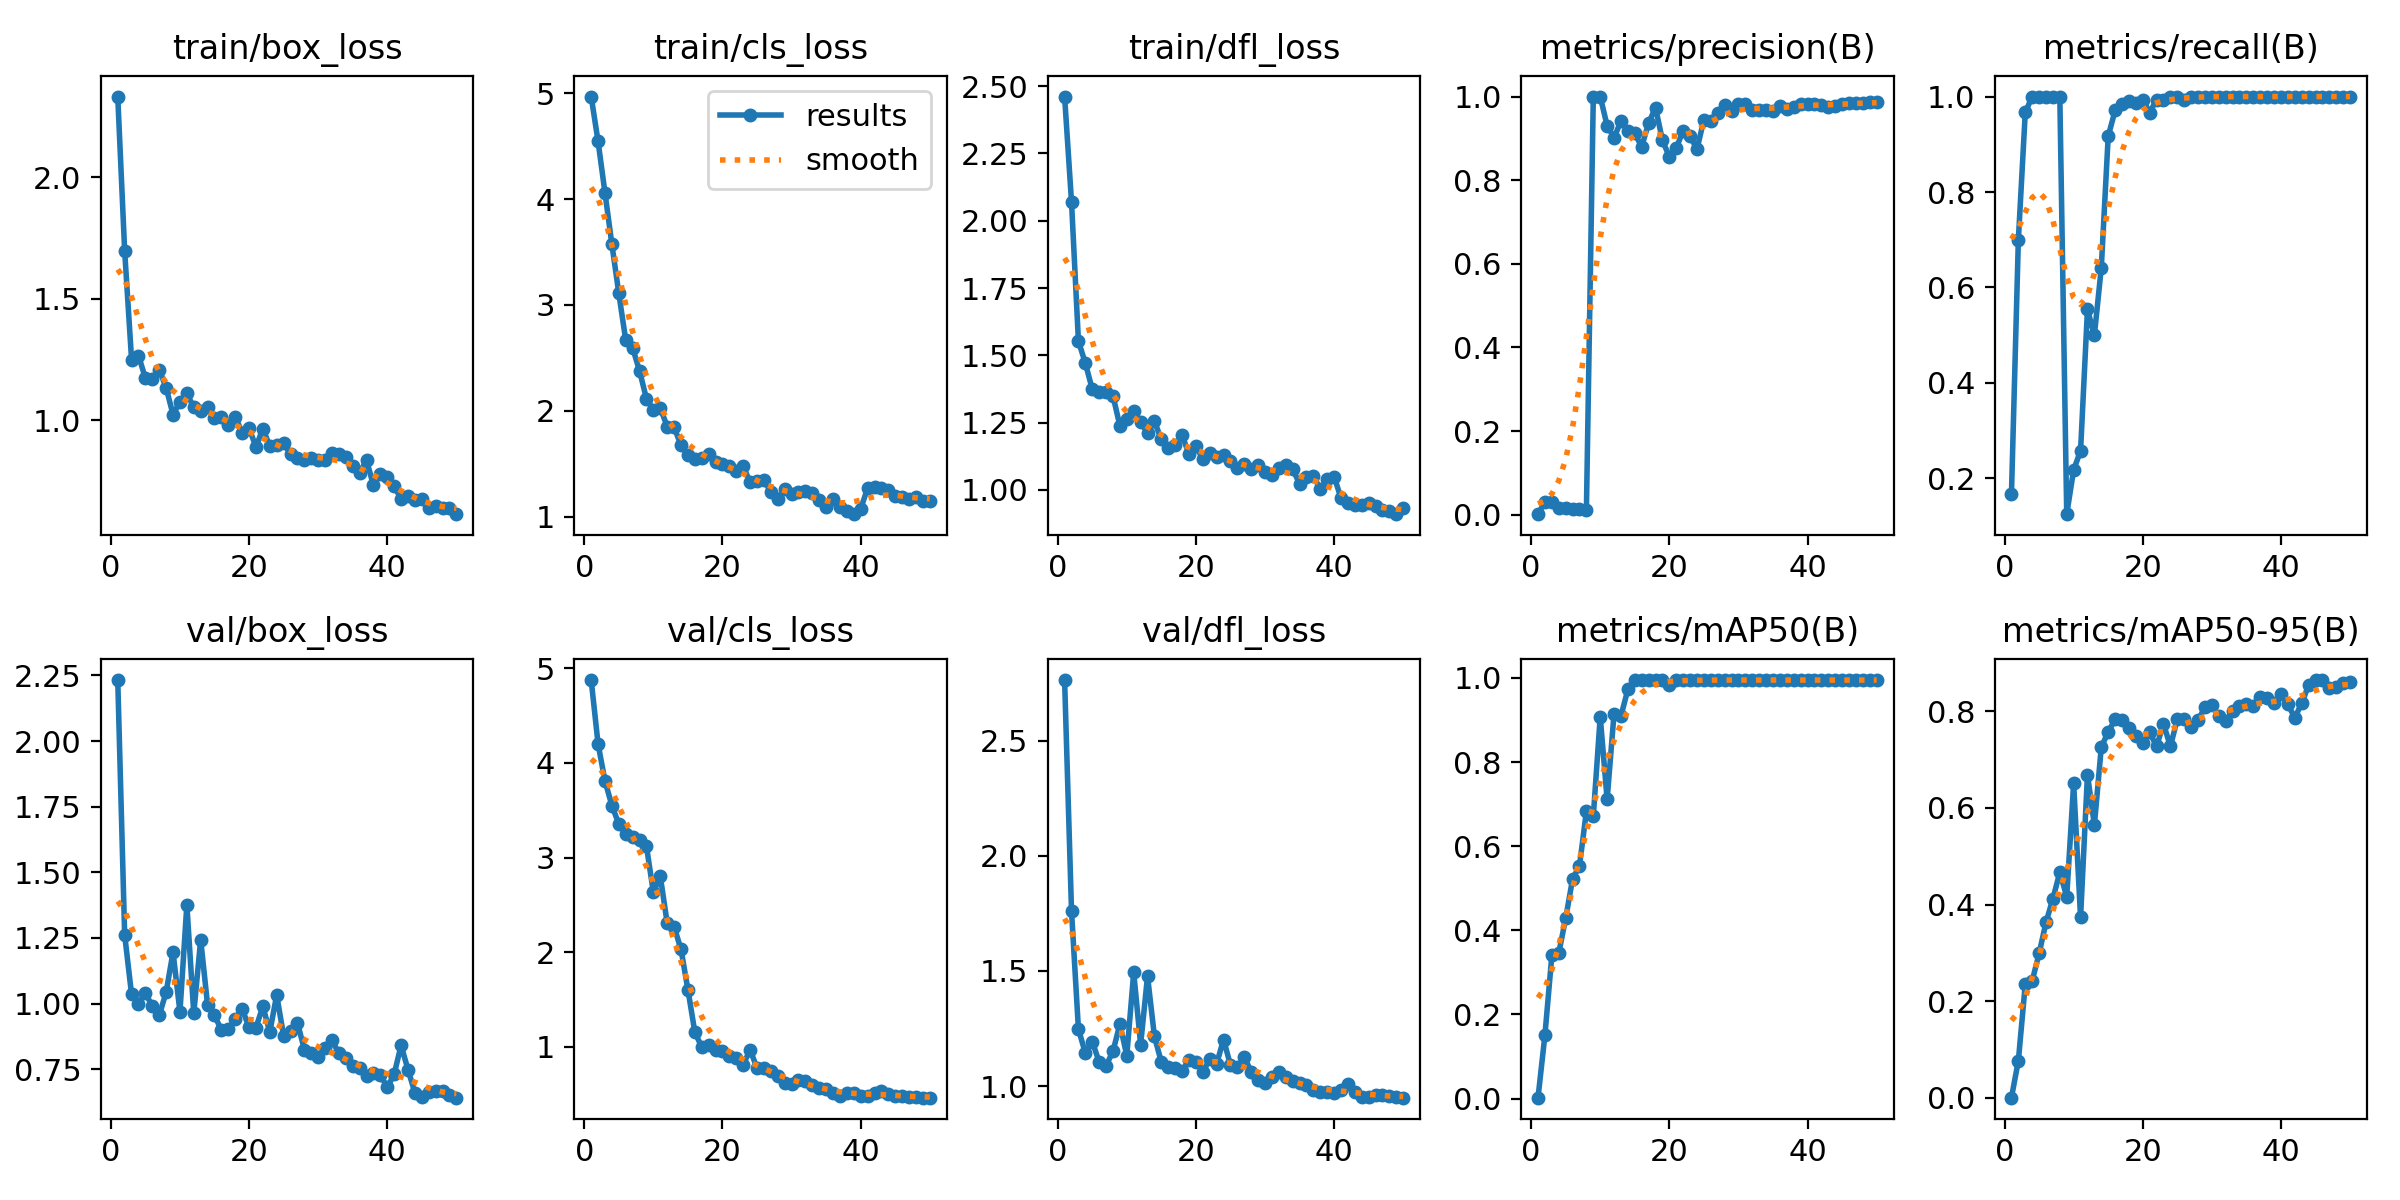

In [19]:
Image("runs/detect/train/results.png", width=600)

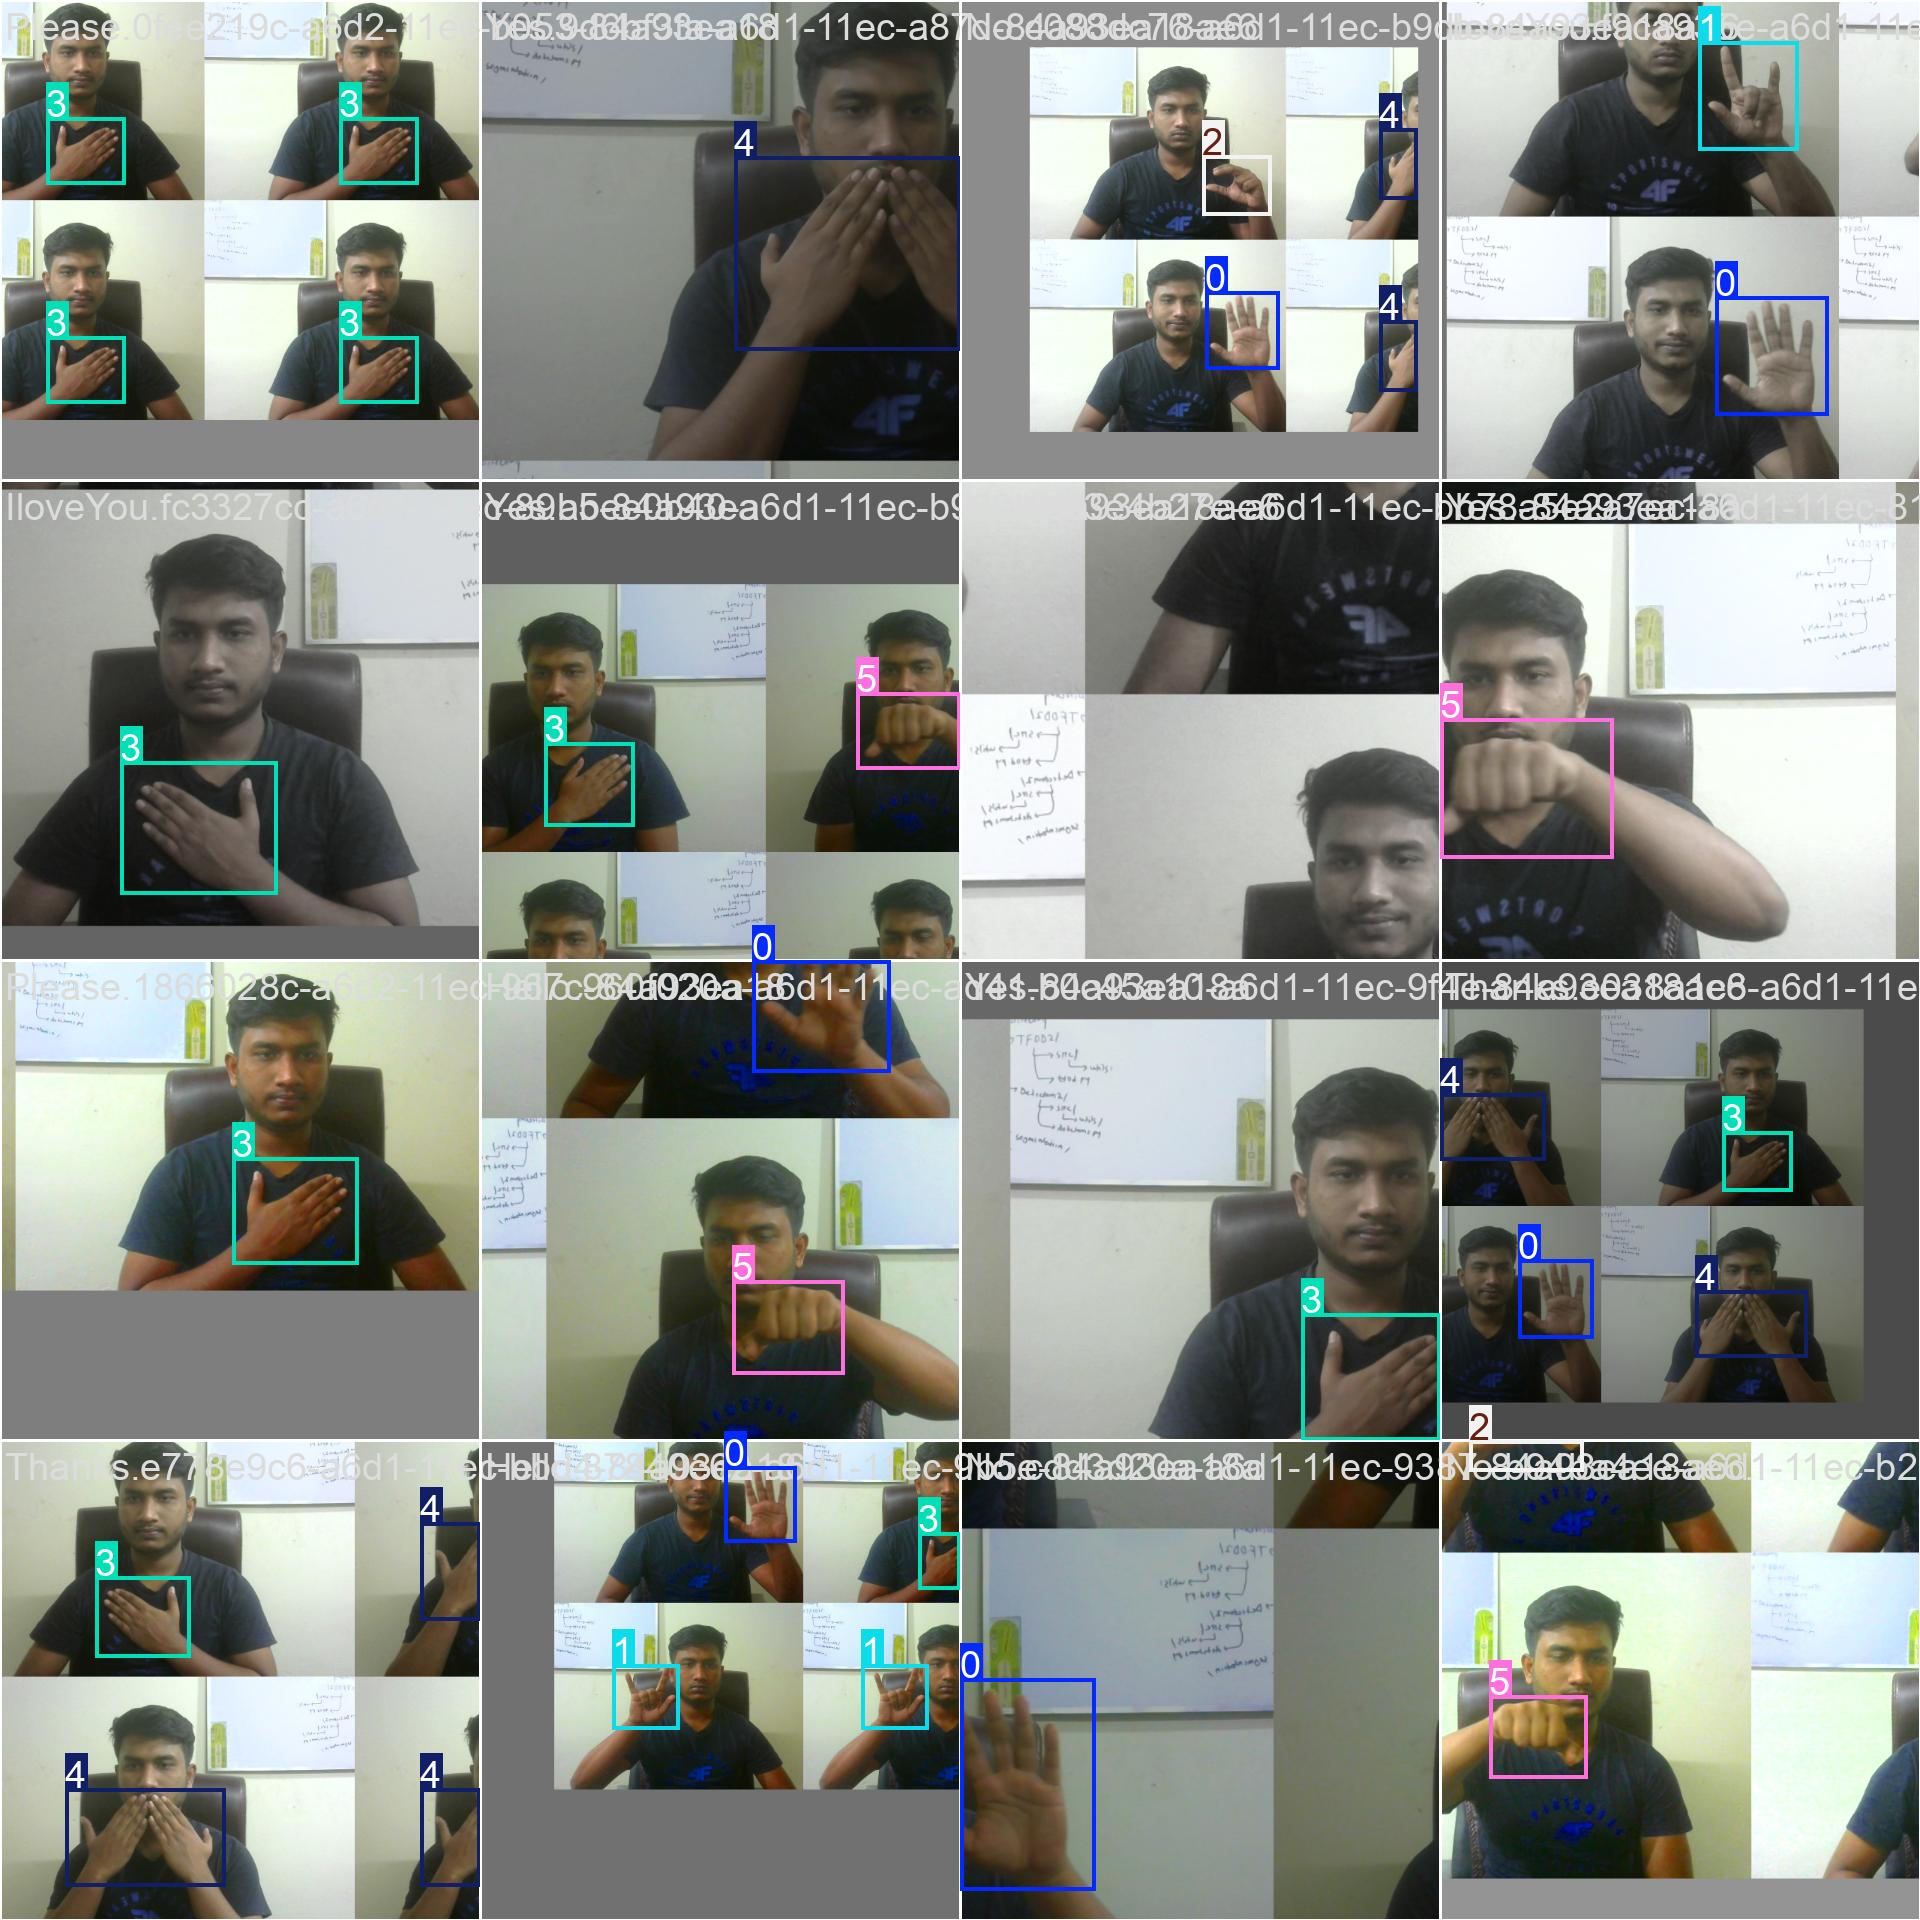

In [20]:
Image("runs/detect/train/train_batch0.jpg", width=600)

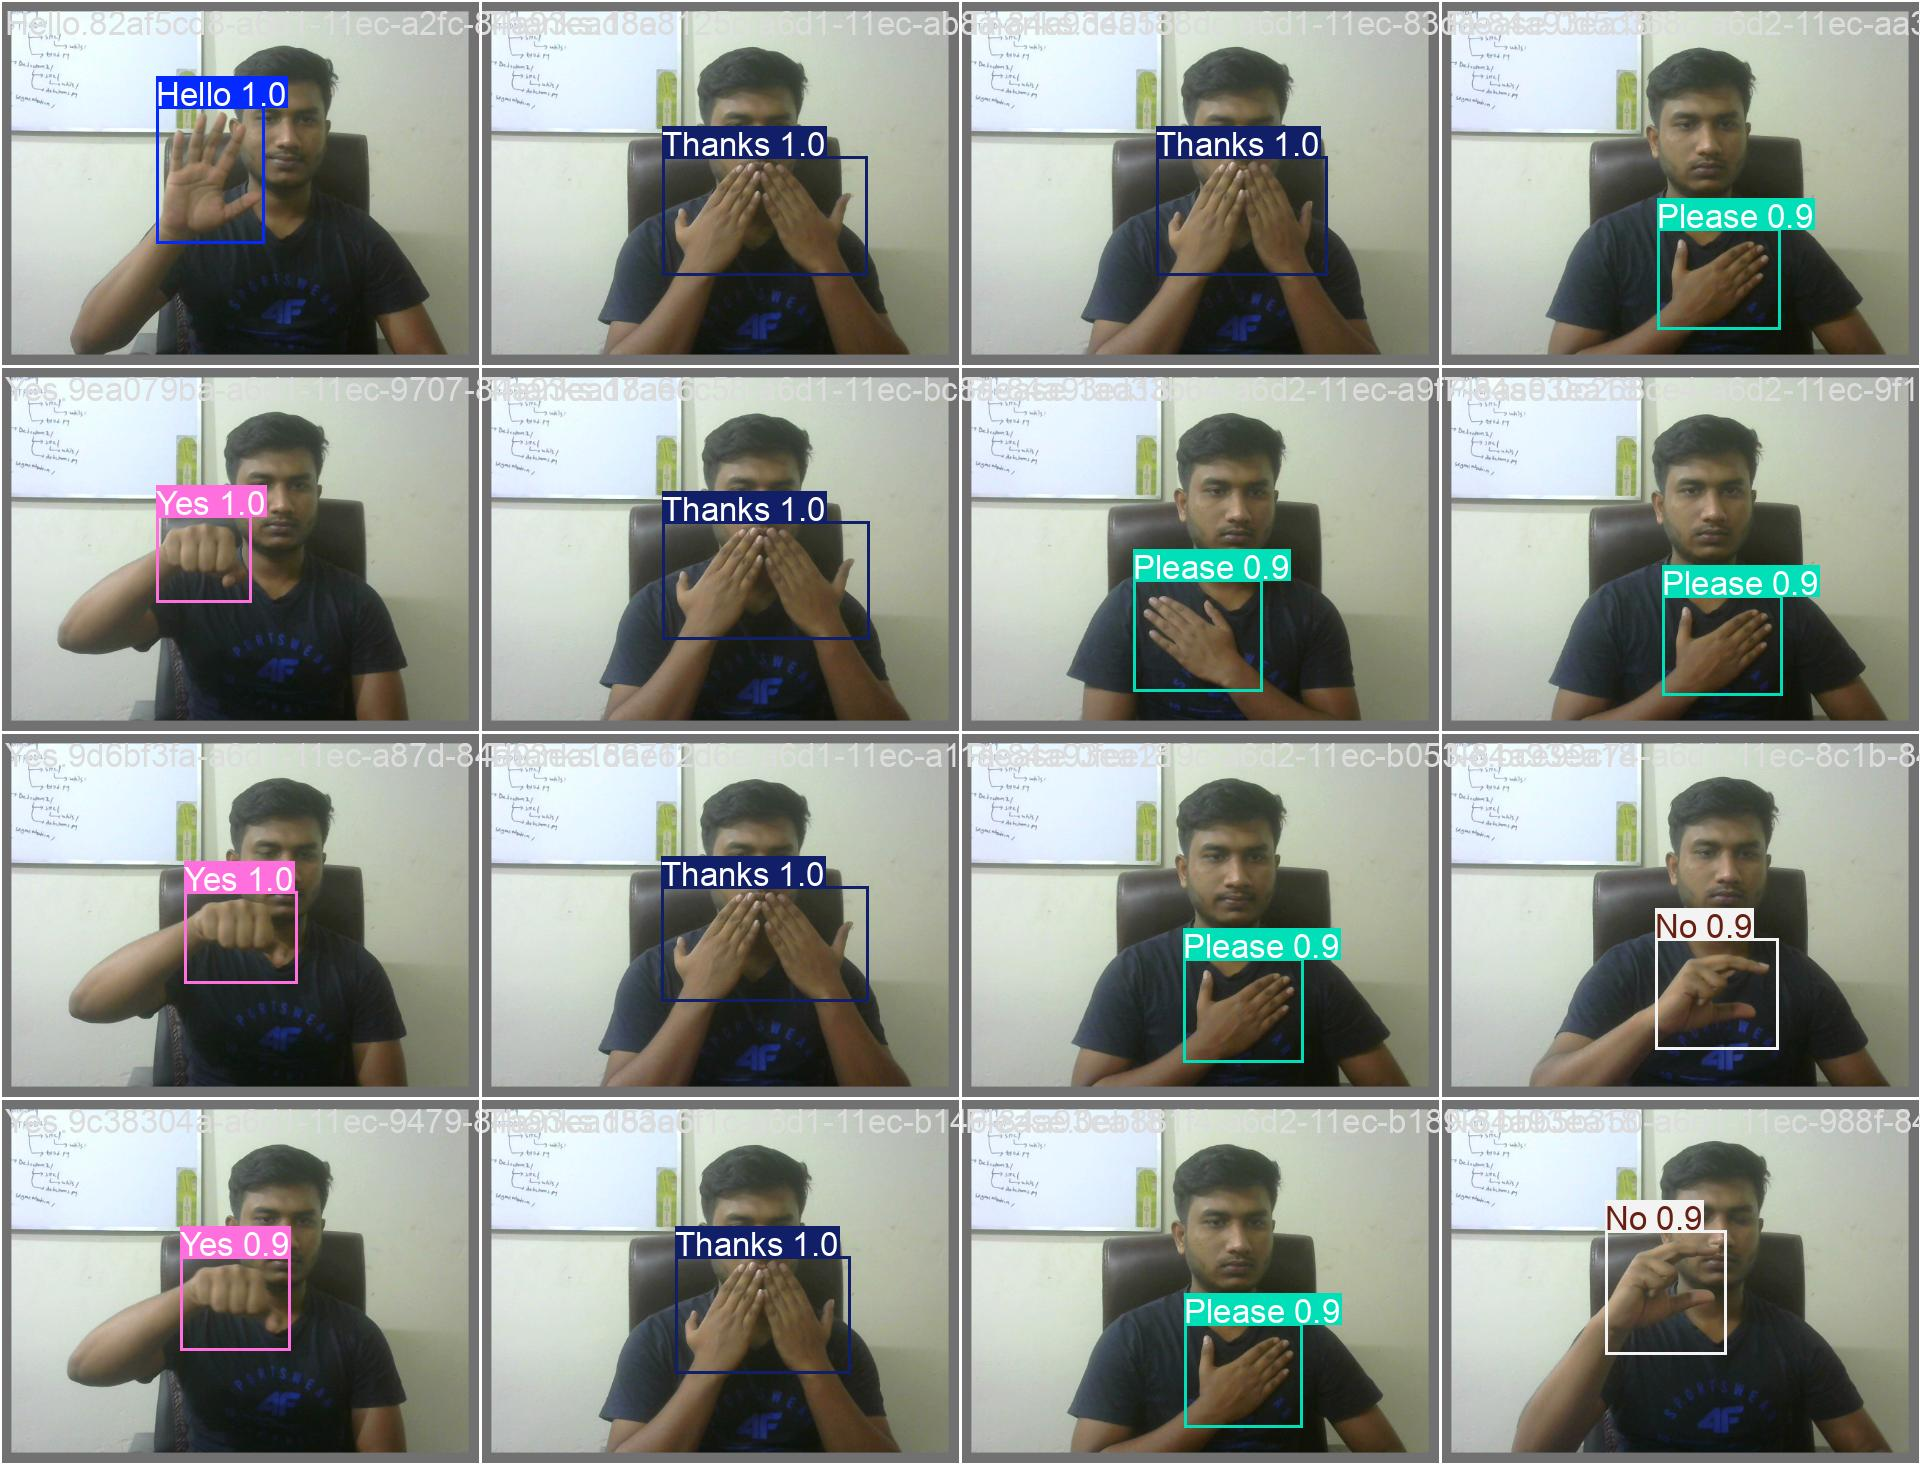

In [21]:
Image("runs/detect/train/val_batch0_pred.jpg", width=600)

**Step 05 Inference with Custom Model on Images**

In [ ]:
!yolo task=detect mode=predict model="runs/detect/train/weights/best.pt" conf=0.25 source="datasets\sign_data\test\images" save=True

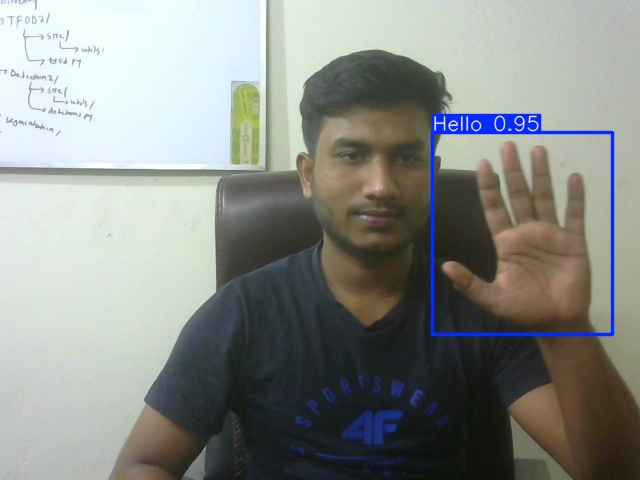

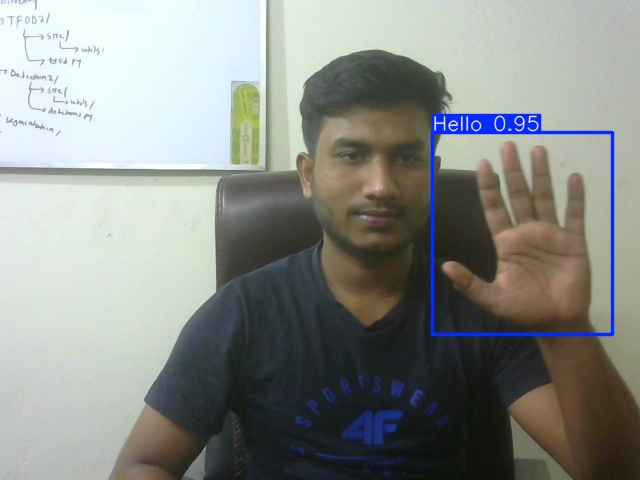

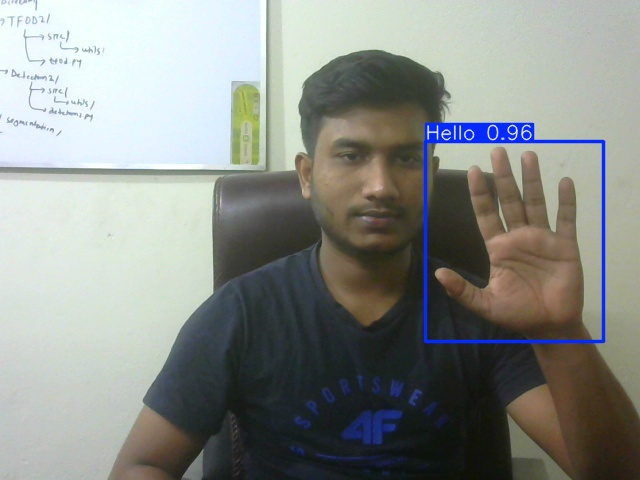

In [27]:
import glob
import os
from IPython.display import Image as IPyImage, display

latest_folder = max(glob.glob('runs/detect/predict*/'), key=os.path.getmtime)
for img in glob.glob(f'{latest_folder}/*.jpg')[1:4]:
    display(IPyImage(filename=img, width=600))
    print("\n")

In [ ]:
!yolo task=detect mode=predict model= "runs/detect/train/weights/best.pt" conf=0.25 source="/content/hello.jpg" save=True

Ultralytics 8.3.19 🚀 Python-3.10.12 torch-2.4.1+cu121 CUDA:0 (NVIDIA A100-SXM4-40GB, 40514MiB)
YOLO11n summary (fused): 238 layers, 2,583,322 parameters, 0 gradients, 6.3 GFLOPs

image 1/1 /content/hello.jpg: 480x640 1 Hello, 56.7ms
Speed: 5.5ms preprocess, 56.7ms inference, 532.0ms postprocess per image at shape (1, 3, 480, 640)
Results saved to runs/detect/predict2
💡 Learn more at https://docs.ultralytics.com/modes/predict


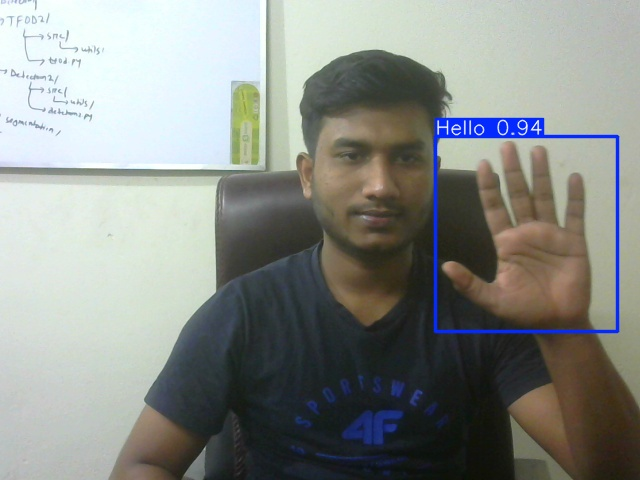

In [16]:
Image("/content/runs/detect/predict2/hello.jpg", width=600)

**Step 06 Inference with Custom Model on Videos**

In [2]:
!yolo task=detect mode=predict model= "runs/detect/train/weights/best.pt" conf=0.25 source=0 save=True show=True

Ultralytics 8.3.119  Python-3.10.8 torch-2.6.0+cu118 CUDA:0 (NVIDIA GeForce RTX 3060 Laptop GPU, 6144MiB)
YOLO11n summary (fused): 100 layers, 2,583,322 parameters, 0 gradients, 6.3 GFLOPs

1/1: 0... Success  (inf frames of shape 640x480 at 30.00 FPS)

0: 480x640 (no detections), 263.0ms
0: 480x640 (no detections), 11.6ms
0: 480x640 (no detections), 9.7ms
0: 480x640 (no detections), 10.4ms
0: 480x640 (no detections), 9.3ms
0: 480x640 (no detections), 10.1ms
0: 480x640 (no detections), 9.3ms
WARNING Waiting for stream 0
0: 480x640 (no detections), 10.0ms
WARNING Waiting for stream 0
0: 480x640 (no detections), 10.9ms
WARNING Waiting for stream 0
0: 480x640 (no detections), 9.7ms
WARNING Waiting for stream 0
0: 480x640 (no detections), 9.9ms
WARNING Waiting for stream 0
0: 480x640 (no detections), 9.2ms
WARNING Waiting for stream 0
0: 480x640 (no detections), 12.9ms
WARNING Waiting for stream 0
0: 480x640 (no detections), 8.9ms
WARNING Waiting for stream 0
0: 480x640 (no detections), 9.5

In [1]:
from ultralytics import YOLO
import cv2

model = YOLO('runs/detect/train/weights/best.pt')
cap = cv2.VideoCapture(0)

if not cap.isOpened():
    print("X -Can't open the camera")
    exit()

try:
    while True:
        ret, frame = cap.read()
        if not ret:
            print("X -Can't read the camera")
            break

        results = model.predict(source=frame, conf=0.25, save=False, show=True, verbose=False)

        # press 'q' to exit
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break

finally:
    cap.release()
    cv2.destroyAllWindows()
    print("O -Already close the camera")

O -Already close the camera
